In [1]:
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns',100)
Data = pd.read_excel("Otw4_mgr.xlsx")
plt.style.use("fivethirtyeight")

In [2]:
Labeleddata = Data.dropna()

In [3]:
Labeleddata_withr8index = Labeleddata.reset_index(drop=True)
test_row = Labeleddata_withr8index.iloc[5]
R8data= Labeleddata_withr8index.drop(5)
R8data = R8data.reset_index(drop=True)
#R8data data with H and H lab and without extracted row with index 50 in labeled data and index 5 with reset_index
TOC = R8data["TOC[%]"]
R8data = R8data.drop(columns=["H", "H (lab.)","TOC[%]"])
TOC_row5=test_row["TOC[%]"]
R8data.shape

(33, 19)

In [11]:
#linear0
lin_svr = SVR(kernel="linear", C=1000.0)
lin_svr.fit(R8data,TOC)
#polynomial
poly_svr = SVR(kernel="poly", C=1000.0, degree = 4)
poly_svr.fit(R8data,TOC)
#Rbf
rbf_svr = SVR(kernel="rbf", C=1000.0,gamma = 0.15)
rbf_svr.fit(R8data,TOC)

sigm_svr = SVR(kernel="sigmoid", C=1000.0)
sigm_svr.fit(R8data,TOC)

SVR(C=1000.0, kernel='sigmoid')

plt.figure(figsize=(16,8))
plt.scatter(list(range(33)),TOC,color = "red", label = "Data")
plt.plot(list(range(33)),rbf_svr.predict(R8data),color = "green", label = "RBF")

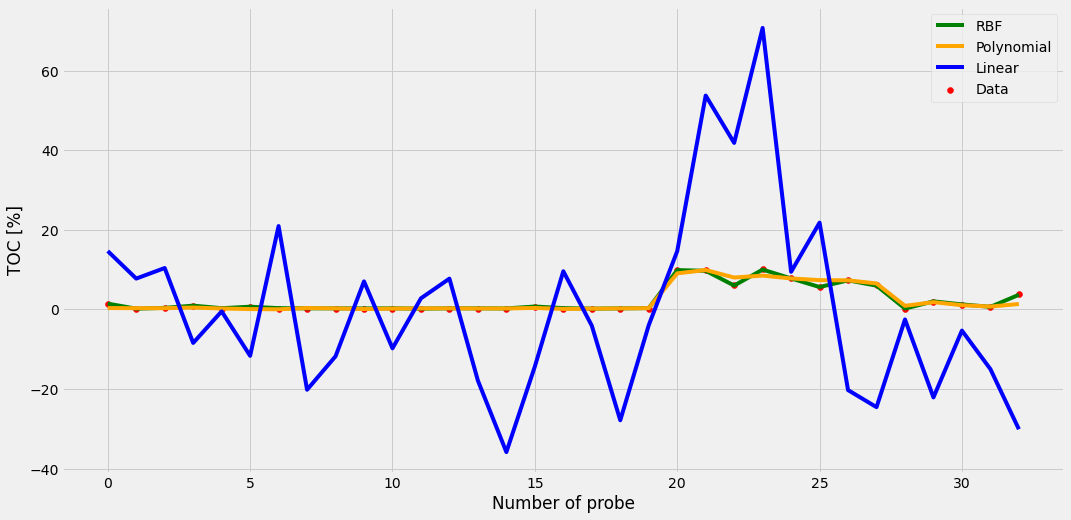

In [14]:
plt.figure(figsize=(16,8))
plt.scatter(list(range(33)),TOC,color = "red", label = "Data")
plt.plot(list(range(33)),rbf_svr.predict(R8data),color = "green", label = "RBF")
plt.plot(list(range(33)),poly_svr.predict(R8data),color = "orange", label = "Polynomial")
plt.plot(list(range(33)),lin_svr.predict(R8data),color = "blue", label = "Linear")
#plt.plot(list(range(33)),sigm_svr.predict(R8data),color = "purple", label = "Sigmoid")
plt.legend()
plt.xlabel("Number of probe")
plt.ylabel("TOC [%]")
plt.show()


In [13]:
model_data = Data.drop(columns=["H", "H (lab.)","TOC[%]"])

print("The RBF SVR predicted", rbf_svr.predict(model_data.iloc[50].values.reshape((1,-1))))
print("The Linear SVR predicted", lin_svr.predict(model_data.iloc[50].values.reshape((1,-1))))
print("The Polynomial SVR predicted", poly_svr.predict(model_data.iloc[50].values.reshape((1,-1))))
print("The Sigmoidal SVR predicted", sigm_svr.predict(model_data.iloc[50].values.reshape((1,-1))))

The RBF SVR predicted [2.21968711]
The Linear SVR predicted [0.19344588]
The Polynomial SVR predicted [-0.03433005]
The Sigmoidal SVR predicted [28.5538421]


In [19]:
print("Actual TOC value :",TOC_row5,"%")

Actual TOC value : 2.05 %
